In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import talib as ta

In [12]:
years=int(input('Anios de historico que quieres recuperar:'))
ticker_symbol=input('ticker:')
end_date= dt.datetime.now() 
start_date = end_date- dt.timedelta(365*years) 

ticker = yf.Ticker(ticker_symbol)

# Obtener el historial de precios
# period='5d' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval='1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# bajamos los datos
ticker_data = ticker.history(start=start_date, end=end_date, interval=interval)
# ticker_data = ticker.history(period=period, interval=interval)
# print(ticker_data)

In [13]:
MACD_FAST = 12
MACD_SLOW = 26
MACD_SIGNAL = 9

In [14]:
data = ticker_data.copy()
data['Close']
data['macd'], data['macdSignal'], data['macdHist'] = ta.MACD(data['Close'],fastperiod=MACD_FAST, slowperiod=MACD_SLOW, signalperiod=MACD_SIGNAL)
data['macd_test'] = np.where((data.macd > data.macdSignal), 1, 0)


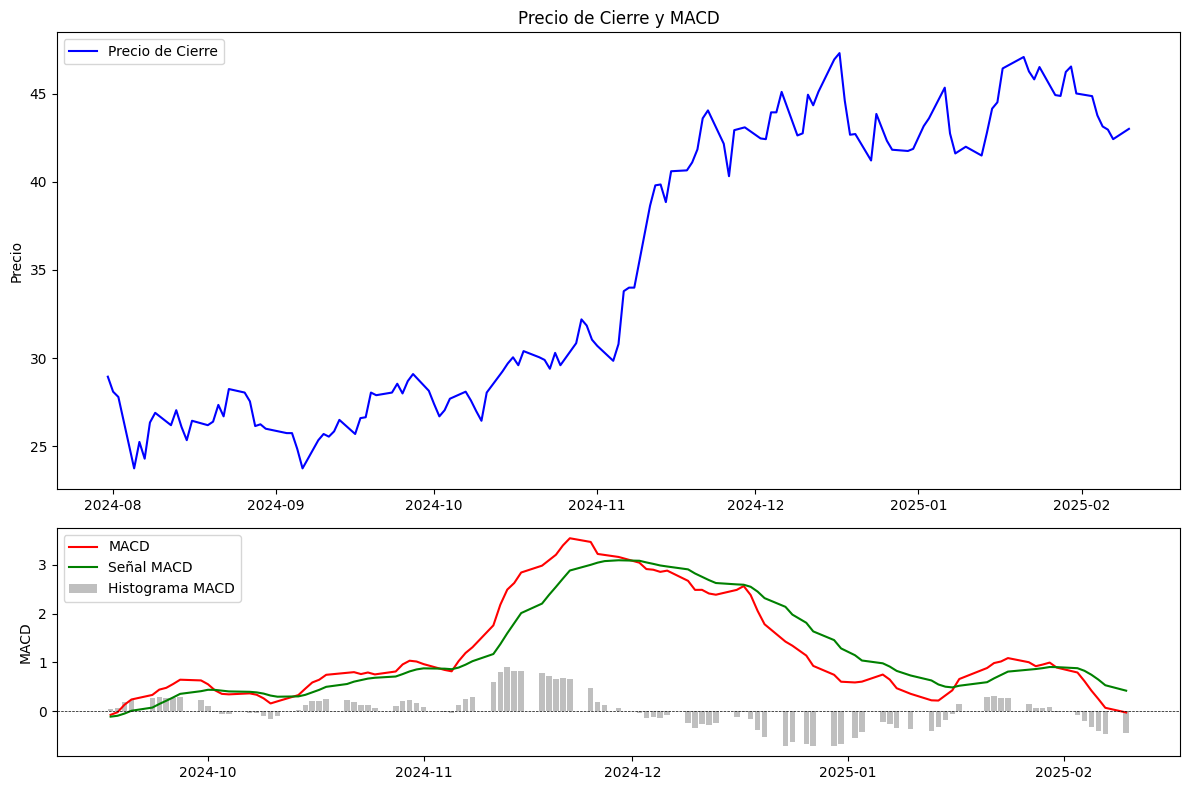

In [ ]:
# Crear una figura y un conjunto de subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

# Gráfico 1: Precio de cierre y medias móviles (opcional)
ax1.plot(data['Close'], label='Precio de Cierre', color='blue')
ax1.set_title('Precio de Cierre y MACD')
ax1.set_ylabel('Precio')
ax1.legend(loc='upper left')

# Gráfico 2: MACD, Señal e Histograma
ax2.plot(data['macd'], label='MACD', color='red')
ax2.plot(data['macdSignal'], label='Señal MACD', color='green')
ax2.bar(data.index, data['macdHist'], label='Histograma MACD', color='gray', alpha=0.5)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Línea horizontal en 0
ax2.set_ylabel('MACD')
ax2.legend(loc='upper left')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

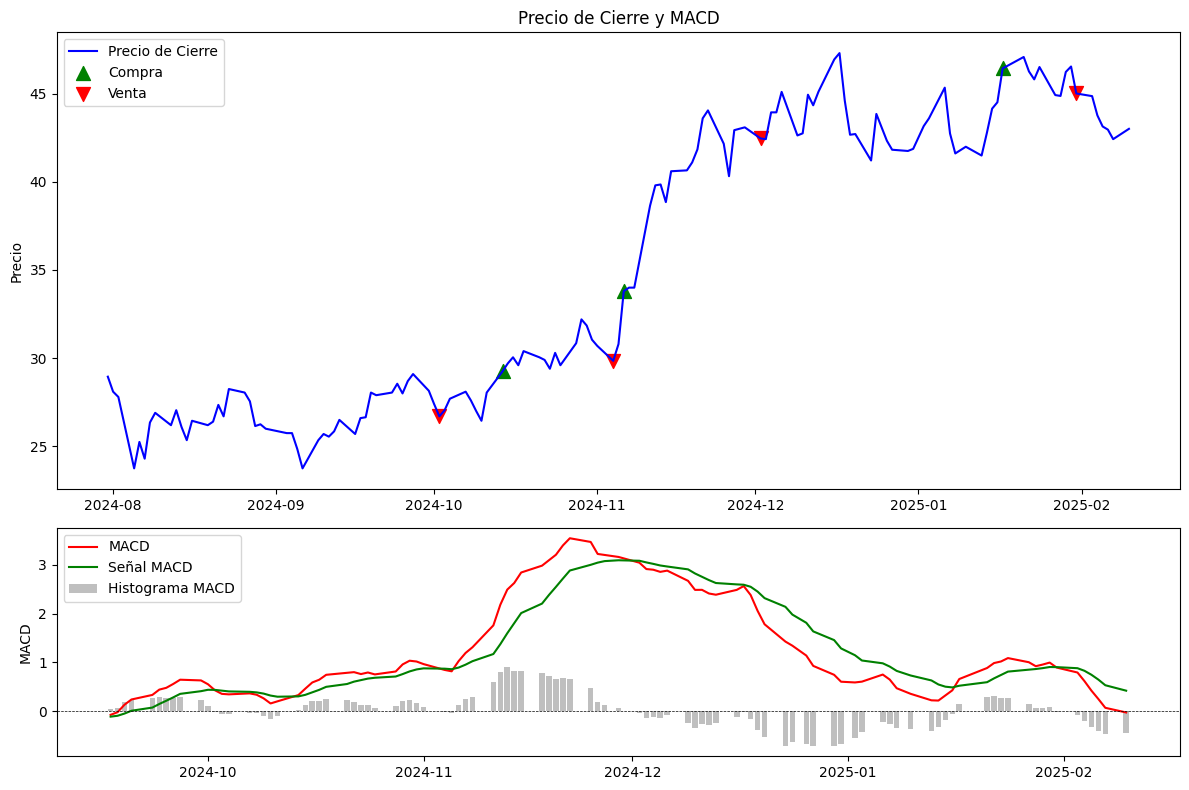

In [16]:
# Crear una figura y subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

# Gráfico 1: Precio de cierre
ax1.plot(data['Close'], label='Precio de Cierre', color='blue')
ax1.set_title('Precio de Cierre y MACD')
ax1.set_ylabel('Precio')

# Identificar cruces del MACD con la Señal
cruce_compra = (data['macd'].shift(1) < data['macdSignal'].shift(1)) & (data['macd'] > data['macdSignal'])
cruce_venta = (data['macd'].shift(1) > data['macdSignal'].shift(1)) & (data['macd'] < data['macdSignal'])

# Añadir marcadores de compra (triángulos verdes hacia arriba)
ax1.scatter(data.index[cruce_compra], data['Close'][cruce_compra], color='green', marker='^', label='Compra', s=100)

# Añadir marcadores de venta (triángulos rojos hacia abajo)
ax1.scatter(data.index[cruce_venta], data['Close'][cruce_venta], color='red', marker='v', label='Venta', s=100)

ax1.legend(loc='upper left')

# Gráfico 2: MACD, Señal e Histograma
ax2.plot(data['macd'], label='MACD', color='red')
ax2.plot(data['macdSignal'], label='Señal MACD', color='green')
ax2.bar(data.index, data['macdHist'], label='Histograma MACD', color='gray', alpha=0.5)
ax2.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Línea horizontal en 0
ax2.set_ylabel('MACD')
ax2.legend(loc='upper left')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
ma1=int(input('ma1:'))
ma2=int(input('ma2:'))
stdate=input('start date in format yyyy-mm-dd:')
eddate=input('end date in format yyyy-mm-dd:')
ticker=input('ticker:')